In [1]:
# import modules
import os
import pandas as pd
import numpy as np

# Set the file path and read the csv
final_billions = "/Users/yenori/Desktop/GitHub/project-1/Final_Billionaires_Statistics.csv"
billions_csv = pd.read_csv(final_billions)

# print the headers of the columns
print (billions_csv.head(0))

Empty DataFrame
Columns: [rank, finalWorth, category, personName, age, country, city, source, industries, countryOfCitizenship, organization, selfMade, status(D-Self Made)(U-Inherited/Unearned), gender, birthDate, lastName, firstName, title, date, state, residenceStateRegion, birthYear, birthMonth, birthDay, cpi_country, cpi_change_country, gdp_country, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country, latitude_country, longitude_country, Marital Status, Children, Education, Bachelor, Master, Doctorate, Drop Out, Self Made]
Index: []

[0 rows x 43 columns]


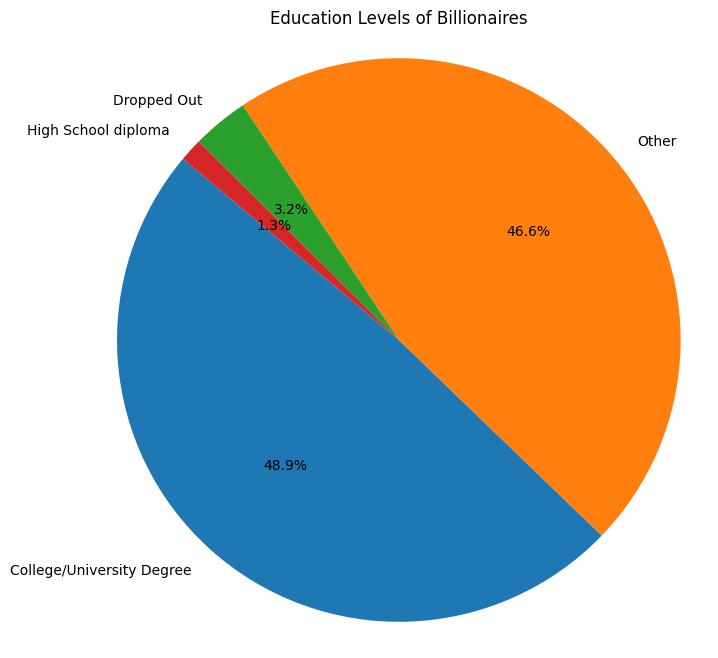

Education Level
College/University Degree    1291
Other                        1229
Dropped Out                    85
High School diploma            35
Name: count, dtype: int64

In [14]:
# Sort the values into Null, Drop out, High School, and University Degrees
def categorize_education(education):
    if pd.isna(education) or education.strip() == "":
        return 'Other'
    if 'Drop Out' in education:
        return 'Dropped Out'
    elif 'High School' in education:
        return 'High School diploma'
    elif 'error' in education:
        return 'Other'
    else:
        return 'College/University Degree'

# Then, create a new 'Education Level' column that categorizes the previous Education column
billions_csv['Education Level'] = billions_csv['Education'].apply(categorize_education)

# Count each value in the Education Level column
education_counts = billions_csv['Education Level'].value_counts()

# Use the counts to make a pie chart that shows the ratio of all the categories from the Education Level column
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Levels of Billionaires')
plt.axis('equal')
plt.show()
display(education_counts)

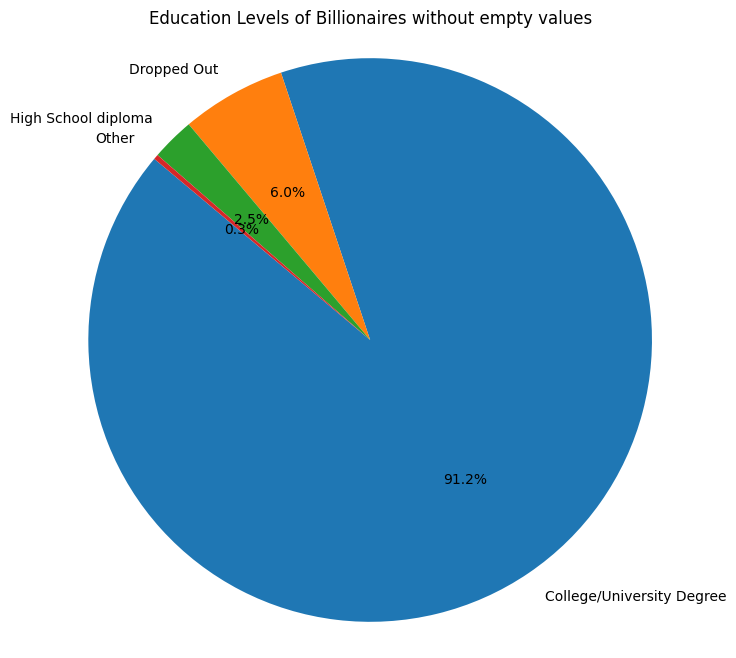

Education Level
College/University Degree    1291
Dropped Out                    85
High School diploma            35
Other                           4
Name: count, dtype: int64

In [16]:
# Drop empty values in the original Education column and generate the pie chart and display counts again
filtered_billionaires = billions_csv.dropna(subset=['Education'])
def categorize_education(education):
    if 'Drop Out' in education:
        return 'Dropped Out'
    elif 'High School' in education:
        return 'High School diploma'
    elif 'error' in education:
        return 'Other'
    else:
        return 'College/University Degree'
filtered_billionaires.loc[:, 'Education Level'] = filtered_billionaires['Education'].apply(categorize_education)
education_counts = filtered_billionaires['Education Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Levels of Billionaires without empty values')
plt.axis('equal')
plt.show()
display(education_counts)